In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
file_path = "/content/drive/MyDrive/Data/NIPS Papers/papers.csv"

In [ ]:
import pandas as pd
data = pd.read_csv(file_path)
data.head(4)

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...


In [ ]:
data = data.drop(['id','event_type','pdf_name'],axis=1)
data.head(4)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...


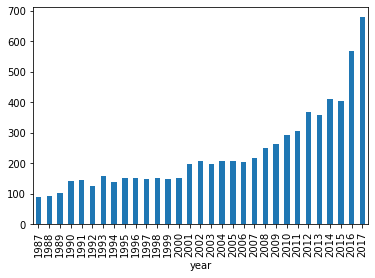

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
counts = data.groupby('year').size()
counts.plot(kind='bar')

In [ ]:
import re
print(data['title'].head())

data['title_cleaned'] = data['title'].map(lambda x: re.sub('[,.\!?]','',x))

data['title_cleaned'] = data['title_cleaned'].str.lower()

print(data['title_cleaned'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_cleaned, dtype: object


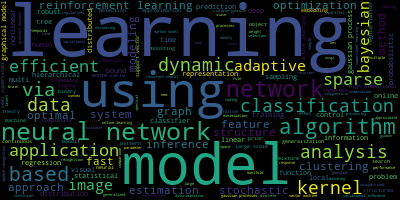

In [ ]:
from wordcloud import WordCloud
long_string = ' '.join(data['title_cleaned'])

wordcloud = WordCloud().generate(long_string)
wordcloud.to_image()

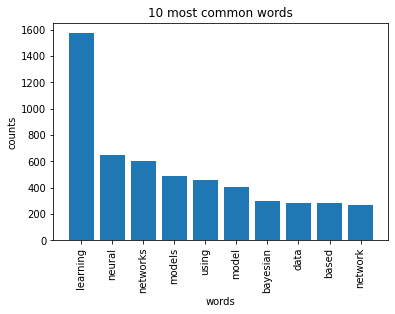

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(data['title_cleaned'])
plot_10_most_common_words(count_data,count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
markov dimensional bounds high random sparse gaussian data hidden processes

Topic #1:
inference bayesian variational information latent gaussian process models distributed dynamic

Topic #2:
large learning scale propagation belief algorithm functions graphs optimization margin

Topic #3:
analysis spike models dependent bandits component neurons search gradient learning

Topic #4:
neural networks network learning recurrent using recognition deep speech control

Topic #5:
model models optimization estimation probabilistic learning graphical selection stochastic bayesian

Topic #6:
image brain model multi segmentation classifiers computer object making information

Topic #7:
learning using vector support based machines memory reinforcement time machine

Topic #8:
learning supervised reinforcement models deep multi online semi function active

Topic #9:
clustering classification rank low matrix optimal spectral data applications regression
